### Helpers (Packages and Functions)

In [107]:
#Packages for NLP
import pickle
import numpy as np
from tqdm import tqdm
import pandas as pd
import json
import string
import nltk
from nltk.corpus import stopwords
from  nltk import FreqDist
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud, ImageColorGenerator

nlp = spacy.load("en_core_web_sm")

In [122]:
#Define stopwords
punctuation = "".join([symbol for symbol in string.punctuation if symbol not in ["'", '"']])
punctuation += '–'

stopwords_list = stopwords.words('english')
stopwords_list += list(punctuation)
stopwords_list += ['yeah','yea','uh','wo','yo','yeah!','ain\'t']

In [123]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
def concat_songs(list_lyrics):
    combo = ' '.join(lyric for lyric in list_lyrics)
    return combo

In [9]:
def get_tokens(songs, remove_stop_words=True):
    """Splits a string of text into individual words"""
    #remove stop words
    stop_words = set(stopwords_list) if remove_stop_words else []
    #tokenize
    words = [x for x in songs.split() if x not in stop_words]
    words = ['N-Word' if x in ['nigga', 'niggas','n*gga','n*ggas'] else x for x in words]
    return words

In [10]:
#replace in' with ing
def replace_contraction(list_lyrics):
    result = []
    for lyric in list_lyrics:
        result.append(lyric.replace("in\'","ing"))
    return result

In [11]:
def lem_words(list_of_tokens,pos): 
    wrd_list = [Word(word).lemmatize(pos=pos) for word in list_of_tokens]
    # join the individual lemmas into a single string
    return wrd_list

## Importing DFs

In [12]:
#Load in a Dataframe all lyrics and artist names
tracks_df = pd.read_pickle('../Data-Cleaning/working_data.pkl')

In [13]:
print(tracks_df.shape)
tracks_df.head()

(27514, 31)


,Artist,Title,Album,Year,Lyrics,name,duration_ms,popularity,num_markets,album,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year_release,Cleaned_lyrics,Lyric_words,Language
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...,Time to Chill,266040,24,79,"He's The DJ, I'm The Rapper",...,0.00172,0.000020,0.0648,0.887,170.385,4,1988,for years i have been waitin and hesitatin to ...,"[for, years, i, have, been, waitin, and, hesit...",en
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ...",Candy (feat. Trippie Redd),156719,78,79,Hotel Diablo,...,0.00829,0.000000,0.1820,0.480,98.019,4,2019,haha big 14 you know what the fuck going on ...,"[haha, big, 14, you, know, what, the, fuck, go...",en
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...,You Ain't a Killer,254866,57,79,Capital Punishment (Explicit Version),...,0.13400,0.000000,0.1120,0.745,90.945,4,1998,the harsh realities of life have taken toll ev...,"[the, harsh, realities, of, life, have, taken,...",en
6,Das EFX,Buck-Buck,Hold It Down,1995-09-26,*Skoob and Dray giving shoutouts*\n\nChorus:\n...,Buck-Buck,193626,22,78,Hold It Down,...,0.29300,0.000000,0.2950,0.531,95.677,4,1995,skoob and dray giving shoutouts chorus well ...,"[skoob, and, dray, giving, shoutouts, chorus, ...",en
9,Kool Moe Dee,To the Beat Y’all,Funke Funke Wisdom,1991-06-11,To the beat...\n\n(To the beat y'all\nTo the b...,To The Beat Y'All,201266,11,77,"Funke, Funke Wisdom",...,0.01930,0.000107,0.3950,0.578,108.597,4,1991,to the beat to the beat y'all to the beat y'a...,"[to, the, beat, to, the, beat, y'all, to, the,...",en


In [14]:
#Load in a Dataframe all lyrics by artist names
artists_df = pd.read_pickle('../Data-Cleaning/artist_data.pkl')

In [15]:
print(artists_df.shape)
artists_df.head()

(277, 3)


,Artist,Cleaned_lyrics,Number_songs
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59


In [16]:
#Load in a Dataframe all lyrics by release year
year_df = pd.read_pickle('../Data-Cleaning/year_data.pkl')

In [17]:
print(year_df.shape)
year_df.head()

(32, 3)


,Year_release,Cleaned_lyrics,Number_songs
10,1988,[for years i have been waitin and hesitatin to...,87
11,1989,[yo this one aight though yo me and cool v dis...,118
12,1990,[ah and we do it like this ah and we do it lik...,104
13,1991,[to the beat to the beat y'all to the beat y'...,182
14,1992,[hello is anybody out there alright well check...,159


## EDA for artists

### Features eng

In [ ]:
#plan
#total words for each artist
#unique words for each artist
#words frequency
#word clouts
#words per songs average
#unique words per songs
#TF-IDF
#LDA

In [18]:
#create a column with all the lyrics
artists_df['all_Lyrics'] = artists_df.Cleaned_lyrics.apply(lambda x: concat_songs(x))

In [19]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...


In [20]:
#tokenize the lyrics
artists_df['tokens_w_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=False))
artists_df['tokens_w_out_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [21]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fuckin', kitche...","[go, hard, mother, fuckin', kitchen, half, thi..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelin's, she, got, me, in, my, feeli...","[feelin's, got, feelin's, got, feelin's, forre..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[c'mon, man, mean, wanna, ride, N-Word, c'mon,..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, hear, heartbeat, sca..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, p..."


In [22]:
#replace in' with ing and remove 's
artists_df['tokens_w_stpw'] = artists_df.tokens_w_stpw.apply(lambda x: replace_contraction(x))
artists_df['tokens_w_out_stpw'] = artists_df.tokens_w_out_stpw.apply(lambda x: replace_contraction(x))

In [23]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelings, she, got, me, in, my, feeli...","[feelings, got, feelings, got, feelings, forre..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[c'mon, man, mean, wanna, ride, N-Word, c'mon,..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, hear, heartbeat, sca..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, p..."


In [24]:
#Lemmatize verbs and nouns
artists_df['tokens_stpw_lemma'] = artists_df.tokens_w_stpw.apply(lambda x: lem_words(x,'n'))
artists_df['tokens_no_stpw_lemma'] = artists_df.tokens_w_out_stpw.apply(lambda x: lem_words(x,'n'))

In [25]:
artists_df['tokens_stpw_lemma'] = artists_df.tokens_stpw_lemma.apply(lambda x: lem_words(x,'v'))
artists_df['tokens_no_stpw_lemma'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: lem_words(x,'v'))

In [26]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi...","[i, go, hard, in, the, mother, fuck, kitchen, ...","[go, hard, mother, fuck, kitchen, half, thing,..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelings, she, got, me, in, my, feeli...","[feelings, got, feelings, got, feelings, forre...","[in, my, feel, she, get, me, in, my, feel, she...","[feel, get, feel, get, feel, forreal, get, fee..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[c'mon, man, mean, wanna, ride, N-Word, c'mon,...","[yo, c'mon, man, what, do, you, mean, you, don...","[c'mon, man, mean, wanna, ride, N-Word, c'mon,..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, hear, heartbeat, sca...","[i, can, hear, your, heartbeat, you're, scar, ...","[hear, heartbeat, scar, hear, heartbeat, scar,..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, p...","[at, 7, be, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, p..."


In [27]:
#count the words for the entire lyrics
artists_df['Count_words_w_stpw'] = artists_df.tokens_stpw_lemma.apply(lambda x: len(x))
artists_df['Count_words_no_stpw'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: len(x))

In [28]:
#count of unique words used per artists
artists_df['Unique_words_w_stpw'] = artists_df.tokens_stpw_lemma.apply(lambda x: len(set(x)))
artists_df['Unique_words_no_stpw'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: len(set(x)))

In [29]:
#Replace name of artist with $ sign
artists_df['Artist_Name'] = artists_df.Artist.apply(lambda x: x.replace('$','S'))

In [30]:
#average words used per each artist
artists_df['Avg_words'] = artists_df.Count_words_no_stpw/artists_df.Number_songs

In [ ]:
artists_df.head()

In [31]:
#unique words taking in account number of songs
artists_df['Avg_uniq_words'] = artists_df.Unique_words_no_stpw/artists_df.Number_songs

In [108]:
#save data frame
with open('../Data-Cleaning/cleaned_artist_data.pkl', 'wb') as file:
    pickle.dump(artists_df, file)

### Graphs

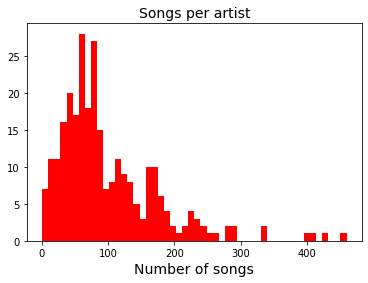

In [32]:
# How many songs do I have for each artist in initial DF?
plt.hist(artists_df.Number_songs,bins=50,color = 'r')
plt.xlabel("Number of songs", fontsize=14)
plt.title("Songs per artist", fontsize=14)
plt.show()

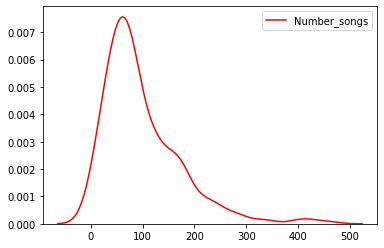

In [33]:
sns.kdeplot(artists_df.Number_songs, color = 'r')
plt.show()

In [35]:
#removing artist with more than 300 songs
artists_df = artists_df[artists_df['Number_songs']<= 300]

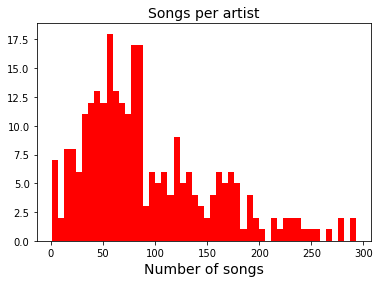

In [36]:
# How many songs do I have for each artist after removing outliers?
plt.hist(artists_df.Number_songs,bins=50,color = 'r')
plt.xlabel("Number of songs", fontsize=14)
plt.title("Songs per artist", fontsize=14)
plt.show()

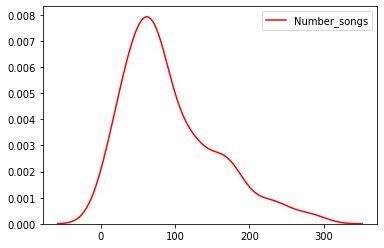

In [37]:
sns.kdeplot(artists_df.Number_songs, color = 'r')
plt.show()

In [ ]:
artists_df.sort_values(by = 'Count_words_no_stpw',ascending=False).head(25)

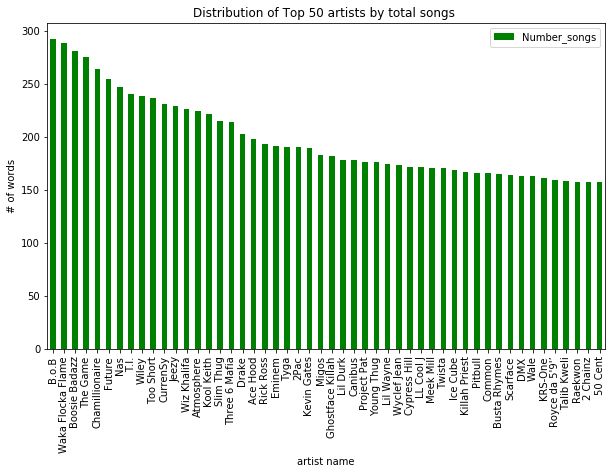

In [38]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Number_songs',ascending=False).head(50).set_index('Artist_Name')['Number_songs'].plot(kind='bar', ax=axes,color='green')
axes.set_title('Distribution of Top 50 artists by total songs ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

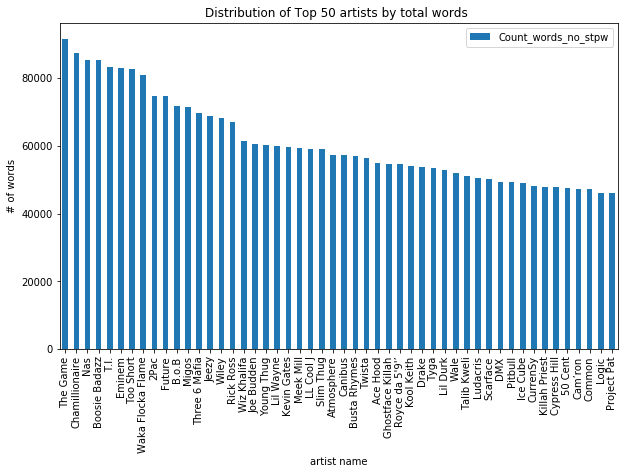

In [39]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Count_words_no_stpw',ascending=False).head(50).set_index('Artist_Name')['Count_words_no_stpw'].plot(kind='bar', ax=axes)
axes.set_title('Distribution of Top 50 artists by total words ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

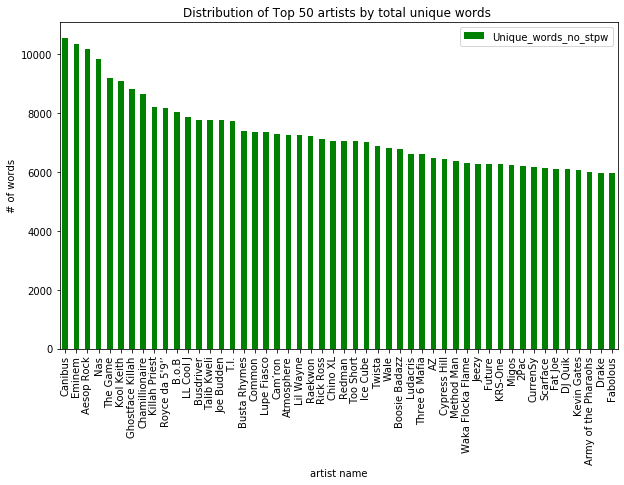

In [40]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Unique_words_no_stpw',ascending=False).head(50).set_index('Artist_Name')['Unique_words_no_stpw'].plot(kind='bar', ax=axes,color='green')
axes.set_title('Distribution of Top 50 artists by total unique words ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

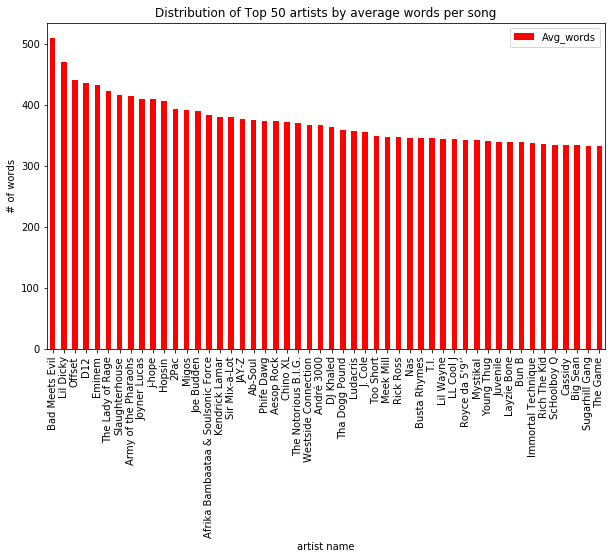

In [41]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Avg_words',ascending=False).head(50).set_index('Artist_Name')['Avg_words'].plot(kind='bar', ax=axes,color='red')
axes.set_title('Distribution of Top 50 artists by average words per song')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

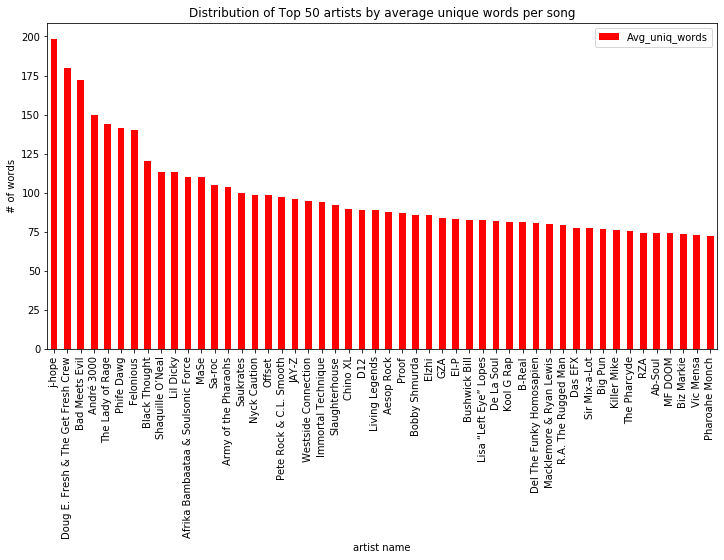

In [43]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

artists_df.sort_values(by = 'Avg_uniq_words',ascending=False).head(50).set_index('Artist_Name')['Avg_uniq_words'].plot(kind='bar', ax=axes,color='red')
axes.set_title('Distribution of Top 50 artists by average unique words per song')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

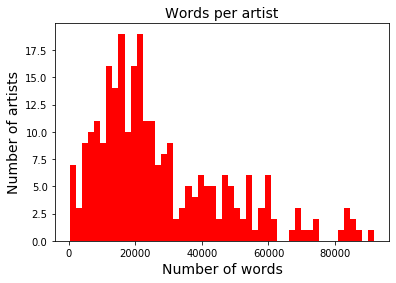

In [47]:
# total words for each artist?
plt.hist(artists_df.Count_words_no_stpw,50,color = 'r')
plt.xlabel("Number of words", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Words per artist", fontsize=14)
plt.show()

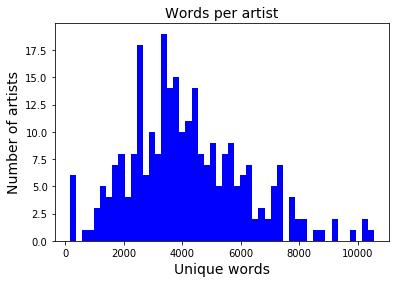

In [48]:
# unique words per artist
plt.hist(artists_df.Unique_words_no_stpw,50,color = 'b')
plt.xlabel("Unique words", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Words per artist", fontsize=14)
plt.show()

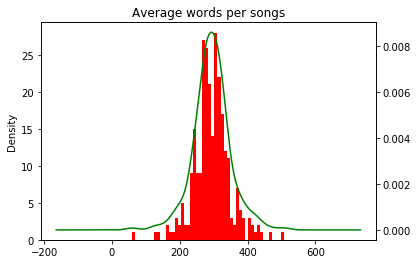

In [49]:
#Showing the distribution of total unique words used
artists_df.Avg_words.plot(kind='hist',color='r',bins=50)
artists_df.Avg_words.plot(kind='kde', secondary_y=True,color='green')
plt.title('Average words per songs')
plt.show()

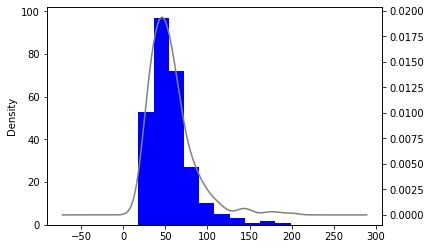

In [50]:
#Showing the distribution of average unique words used
artists_df.Avg_uniq_words.plot(kind='hist',color='blue')
artists_df.Avg_uniq_words.plot(kind='kde', secondary_y=True,color='gray')

In [53]:
artists_df.head(1)

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma,Count_words_w_stpw,Count_words_no_stpw,Unique_words_w_stpw,Unique_words_no_stpw,Artist_Name,Avg_words,Avg_uniq_words
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi...","[i, go, hard, in, the, mother, fuck, kitchen, ...","[go, hard, mother, fuck, kitchen, half, thing,...",79990,44343,5666,5545,2 Chainz,280.651899,35.094937


In [54]:
lyrics = list(artists_df.tokens_no_stpw_lemma)

In [55]:
len(lyrics)

271

In [56]:
all_lyrics = []
for lyric in lyrics:
    for token in lyric:
        all_lyrics.append(token)

In [57]:
len(all_lyrics)

7426111

In [142]:
all_lyrics[:4]

['go', 'hard', 'mother', 'fuck']

In [58]:
lyrics_words=concat_songs(all_lyrics)

In [149]:
lyrics_words[:20]

'go hard mother fuck '

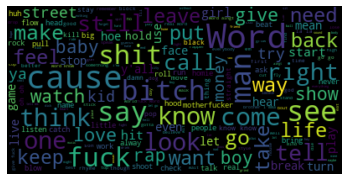

In [155]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40,background_color='black').generate_from_text(lyrics_words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [145]:
#find the words frequency for all lyrics
freq_w = nltk.FreqDist(all_lyrics)

In [146]:
len(freq_w)

125587

In [147]:
#find the 25 most frequent words
most_freq = freq_w.most_common(25)
most_freq

[('get', 186817),
 ("i'm", 145240),
 ('like', 119139),
 ('N-Word', 118920),
 ('know', 80519),
 ('go', 65595),
 ('aingt', 59374),
 ('fuck', 57750),
 ('make', 49083),
 ('shit', 48933),
 ('bitch', 48381),
 ('say', 46787),
 ('see', 45645),
 ('come', 43378),
 ('back', 39033),
 ('one', 35822),
 ('take', 34066),
 ('love', 33111),
 ('tell', 32506),
 ('time', 31581),
 ('man', 31573),
 ("that's", 30113),
 ('want', 29439),
 ('never', 28939),
 ('wanna', 28244)]

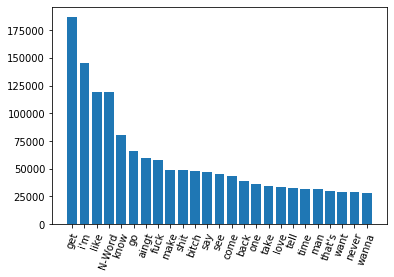

In [138]:
#Visualize the most frequent words
plt.bar(range(len(most_freq)), [val[1] for val in most_freq], align='center')
plt.xticks(range(len(most_freq)), [val[0] for val in most_freq])
plt.xticks(rotation=70)
plt.show()

In [65]:
from os import path
from PIL import Image
import os

In [67]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

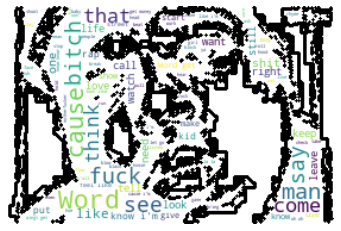

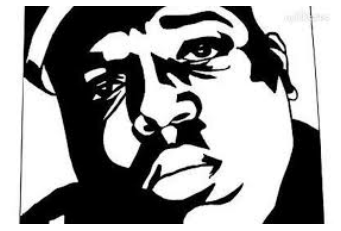

In [75]:
hiphop_mask = np.array(Image.open(path.join(d, "hip-hop-graph.jpg")))
wc = WordCloud(background_color="white", max_words=2000, mask=hiphop_mask,
               stopwords=stopwords_list, contour_width=3, contour_color='black')

# generate word cloud
wc.generate(lyrics_words)

# store to file
wc.to_file(path.join(d, "test.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(hiphop_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## EDA for years

### Feat eng

In [77]:
year_df.head()

,Year_release,Cleaned_lyrics,Number_songs
10,1988,[for years i have been waitin and hesitatin to...,87
11,1989,[yo this one aight though yo me and cool v dis...,118
12,1990,[ah and we do it like this ah and we do it lik...,104
13,1991,[to the beat to the beat y'all to the beat y'...,182
14,1992,[hello is anybody out there alright well check...,159


In [ ]:
#plan
#total words for year
#unique words for year
#words frequency
#word clouts
#words per songs average
#unique words per songs
#TF-IDF
#LDA

In [82]:
#create a column with all the lyrics
year_df['all_Lyrics'] = year_df.Cleaned_lyrics.apply(lambda x: concat_songs(x))

In [83]:
year_df.head()

,Year_release,Cleaned_lyrics,Number_songs,all_Lyrics
10,1988,[for years i have been waitin and hesitatin to...,87,for years i have been waitin and hesitatin to ...
11,1989,[yo this one aight though yo me and cool v dis...,118,yo this one aight though yo me and cool v dis ...
12,1990,[ah and we do it like this ah and we do it lik...,104,ah and we do it like this ah and we do it like...
13,1991,[to the beat to the beat y'all to the beat y'...,182,to the beat to the beat y'all to the beat y'a...
14,1992,[hello is anybody out there alright well check...,159,hello is anybody out there alright well check ...


In [84]:
#tokenize the lyrics
year_df['tokens_w_stpw'] = year_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=False))
year_df['tokens_w_out_stpw'] = year_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [85]:
#replace in' with ing
year_df['tokens_w_stpw'] = year_df.tokens_w_stpw.apply(lambda x: replace_contraction(x))
year_df['tokens_w_out_stpw'] = year_df.tokens_w_out_stpw.apply(lambda x: replace_contraction(x))


In [86]:
#Lemmatize verbs and nouns
year_df['tokens_stpw_lemma'] = year_df.tokens_w_stpw.apply(lambda x: lem_words(x,'n'))
year_df['tokens_no_stpw_lemma'] = year_df.tokens_w_out_stpw.apply(lambda x: lem_words(x,'n'))
year_df['tokens_stpw_lemma'] = year_df.tokens_stpw_lemma.apply(lambda x: lem_words(x,'v'))
year_df['tokens_no_stpw_lemma'] = year_df.tokens_no_stpw_lemma.apply(lambda x: lem_words(x,'v'))


In [88]:
year_df.head()

,Year_release,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma
10,1988,[for years i have been waitin and hesitatin to...,87,for years i have been waitin and hesitatin to ...,"[for, years, i, have, been, waitin, and, hesit...","[years, waitin, hesitatin, make, rap, record, ...","[for, year, i, have, be, waitin, and, hesitati...","[year, waitin, hesitatin, make, rap, record, p..."
11,1989,[yo this one aight though yo me and cool v dis...,118,yo this one aight though yo me and cool v dis ...,"[yo, this, one, aight, though, yo, me, and, co...","[one, aight, though, cool, v, dis, dis, dis, g...","[yo, this, one, aight, though, yo, me, and, co...","[one, aight, though, cool, v, dis, dis, dis, g..."
12,1990,[ah and we do it like this ah and we do it lik...,104,ah and we do it like this ah and we do it like...,"[ah, and, we, do, it, like, this, ah, and, we,...","[ah, like, ah, like, ah, like, ah, like, days,...","[ah, and, we, do, it, like, this, ah, and, we,...","[ah, like, ah, like, ah, like, ah, like, day, ..."
13,1991,[to the beat to the beat y'all to the beat y'...,182,to the beat to the beat y'all to the beat y'a...,"[to, the, beat, to, the, beat, y'all, to, the,...","[beat, beat, y'all, beat, y'all, beat, y'all, ...","[to, the, beat, to, the, beat, y'all, to, the,...","[beat, beat, y'all, beat, y'all, beat, y'all, ..."
14,1992,[hello is anybody out there alright well check...,159,hello is anybody out there alright well check ...,"[hello, is, anybody, out, there, alright, well...","[hello, anybody, alright, well, check, cordial...","[hello, be, anybody, out, there, alright, well...","[hello, anybody, alright, well, check, cordial..."


In [89]:
#count the words for the entire lyrics
year_df['Count_words_w_stpw'] = year_df.tokens_stpw_lemma.apply(lambda x: len(x))
year_df['Count_words_no_stpw'] = year_df.tokens_no_stpw_lemma.apply(lambda x: len(x))


In [90]:
#count of unique words used per year
year_df['Unique_words_w_stpw'] = year_df.tokens_stpw_lemma.apply(lambda x: len(set(x)))
year_df['Unique_words_no_stpw'] = year_df.tokens_no_stpw_lemma.apply(lambda x: len(set(x)))


In [91]:
#average words used per year
year_df['Avg_words'] = year_df.Count_words_no_stpw/year_df.Number_songs


In [92]:
#unique words taking in account number of songs
year_df['Avg_uniq_words'] = year_df.Unique_words_no_stpw/year_df.Number_songs

In [93]:
year_df.head()

,Year_release,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma,Count_words_w_stpw,Count_words_no_stpw,Unique_words_w_stpw,Unique_words_no_stpw,Avg_words,Avg_uniq_words
10,1988,[for years i have been waitin and hesitatin to...,87,for years i have been waitin and hesitatin to ...,"[for, years, i, have, been, waitin, and, hesit...","[years, waitin, hesitatin, make, rap, record, ...","[for, year, i, have, be, waitin, and, hesitati...","[year, waitin, hesitatin, make, rap, record, p...",51623,27469,5180,5055,315.735632,58.103448
11,1989,[yo this one aight though yo me and cool v dis...,118,yo this one aight though yo me and cool v dis ...,"[yo, this, one, aight, though, yo, me, and, co...","[one, aight, though, cool, v, dis, dis, dis, g...","[yo, this, one, aight, though, yo, me, and, co...","[one, aight, though, cool, v, dis, dis, dis, g...",73501,39670,6741,6613,336.186441,56.042373
12,1990,[ah and we do it like this ah and we do it lik...,104,ah and we do it like this ah and we do it like...,"[ah, and, we, do, it, like, this, ah, and, we,...","[ah, like, ah, like, ah, like, ah, like, days,...","[ah, and, we, do, it, like, this, ah, and, we,...","[ah, like, ah, like, ah, like, ah, like, day, ...",56991,30867,5518,5388,296.798077,51.807692
13,1991,[to the beat to the beat y'all to the beat y'...,182,to the beat to the beat y'all to the beat y'a...,"[to, the, beat, to, the, beat, y'all, to, the,...","[beat, beat, y'all, beat, y'all, beat, y'all, ...","[to, the, beat, to, the, beat, y'all, to, the,...","[beat, beat, y'all, beat, y'all, beat, y'all, ...",92703,49872,7412,7281,274.021978,40.005495
14,1992,[hello is anybody out there alright well check...,159,hello is anybody out there alright well check ...,"[hello, is, anybody, out, there, alright, well...","[hello, anybody, alright, well, check, cordial...","[hello, be, anybody, out, there, alright, well...","[hello, anybody, alright, well, check, cordial...",90915,50700,8353,8226,318.867925,51.735849


In [109]:
#save data frame
with open('../Data-Cleaning/cleaned_year_data.pkl', 'wb') as file:
    pickle.dump(year_df, file)

### graphs

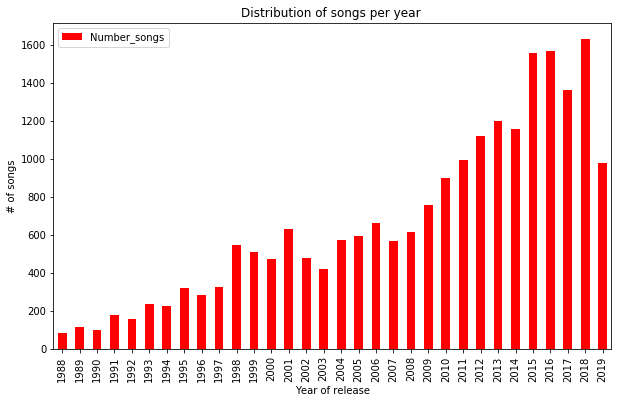

In [99]:
# How many songs do I have each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Number_songs'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of songs per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of songs")
axes.legend()
plt.show()

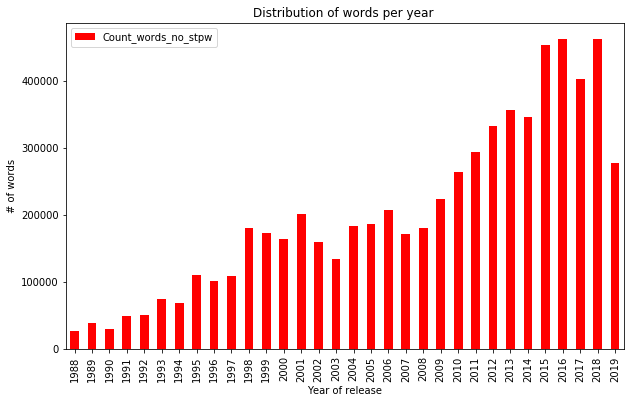

In [102]:
# How many words do I have each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Count_words_no_stpw'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of words per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

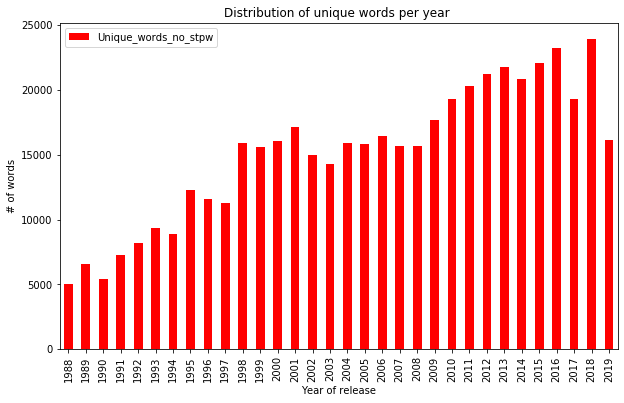

In [103]:
# How many unique words do I have each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Unique_words_no_stpw'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of unique words per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

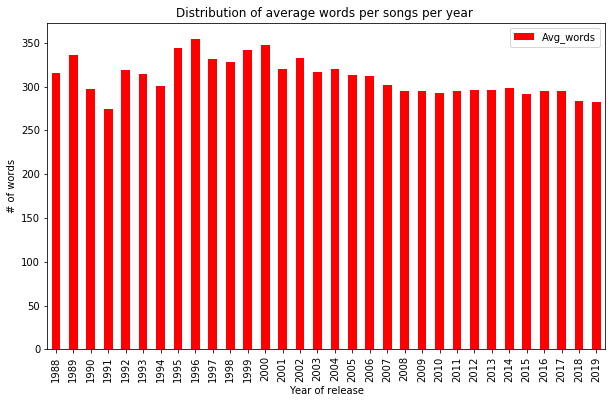

In [104]:
# avg words each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Avg_words'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of average words per songs per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

In [ ]:
#ANOVA


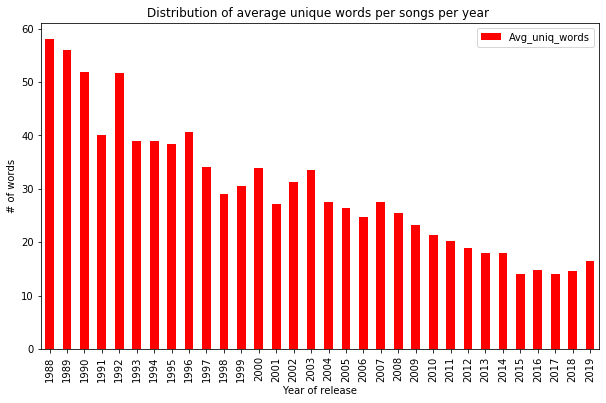

In [105]:
# avg unique words each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Avg_uniq_words'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of average unique words per songs per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

In [ ]:
#ANOVA

In [ ]:
#word clout per year


In [ ]:
def create_word_clouds(model, n=2, j=5, save=0, start=0, stop=None):
    """
    create_word_clouds(model, n, j, save, start, stop):
    Params:
        model: gensim LDA model object
        n: number of subplots in a column  (default=2)
        j: number of subplots in a row (default=5)
        save: save the figure (optional, default=0)
        start: from what number topic you wish to create the subplot (optional, default=0)
        stop: stop the subplot at a certain topic (optional, default=None)
        
    Returns:
        Word cloud image for every topic LDA created
    """
    # create color list
    colors_list = [color for name, color in mcolors.XKCD_COLORS.items()]
    
    # instantiate cloud
    cloud = WordCloud(background_color='white',
                      width=1028,
                      height=726,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: colors_list[start],
                      prefer_horizontal=1.0)
    
    # extract topics
    topics = model.show_topics(formatted=False)
    
    # create subplots 
    fig, axes = plt.subplots(n, j, figsize=(10,10), sharex=True, sharey=True)
    
    for ax in axes.flatten():
        fig.add_subplot(ax)
        topic_words = dict(topics[start][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(start+1), fontdict=dict(size=16))
        # hide axis
        plt.gca().axis('off')
        start += 1
        if start == stop:
            break
        
    plt.subplots_adjust(wspace=0, hspace=0)
    # hide axis
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    if save:
        plt.savefig(f'topics_cloud{start}.png')
    plt.show()

In [ ]:
#Looking at the distribution
plt.style.use('ggplot')
tracks_df.speechiness.hist()
plt.show()